Mounted at /content/drive
1/1 [==============================] - 1s 793ms/step
Training Bernoulli Naive Bayes for VGG16...
Performance metrics for Bernoulli Naive Bayes with VGG16:
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.48      0.56       105
           1       0.42      0.77      0.54       105
           2       0.52      0.35      0.42       105
           3       0.69      0.47      0.56       105
           4       0.53      0.57      0.55       105

    accuracy                           0.53       525
   macro avg       0.56      0.53      0.52       525
weighted avg       0.56      0.53      0.52       525

Accuracy: 0.5276190476190477
Sensitivity: 0.5276190476190477
Precision: 0.5643551669940059
F1 Score: 0.5245159016749249



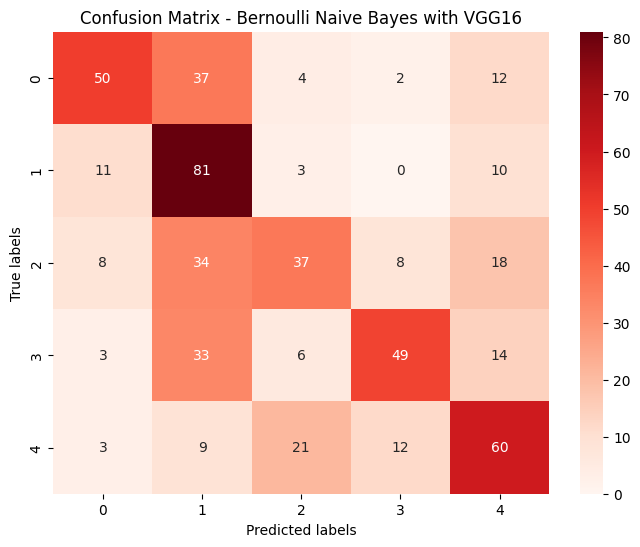

Training Multinomial Naive Bayes for VGG16...
Performance metrics for Multinomial Naive Bayes with VGG16:
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.50      0.62       105
           1       0.48      0.89      0.63       105
           2       0.58      0.51      0.55       105
           3       0.74      0.57      0.65       105
           4       0.70      0.65      0.67       105

    accuracy                           0.62       525
   macro avg       0.67      0.62      0.62       525
weighted avg       0.67      0.62      0.62       525

Accuracy: 0.6228571428571429
Sensitivity: 0.6228571428571429
Precision: 0.669100301457094
F1 Score: 0.622580055958078



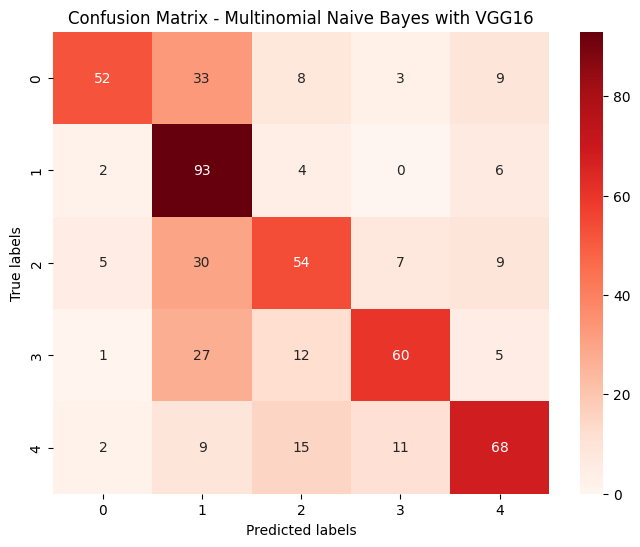

Training Complement Naive Bayes for VGG16...
Performance metrics for Complement Naive Bayes with VGG16:
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.56      0.69       105
           1       0.47      0.92      0.62       105
           2       0.79      0.50      0.61       105
           3       0.88      0.56      0.69       105
           4       0.72      0.82      0.77       105

    accuracy                           0.67       525
   macro avg       0.75      0.67      0.68       525
weighted avg       0.75      0.67      0.68       525

Accuracy: 0.6723809523809524
Sensitivity: 0.6723809523809523
Precision: 0.7530406679945749
F1 Score: 0.6752033485512124



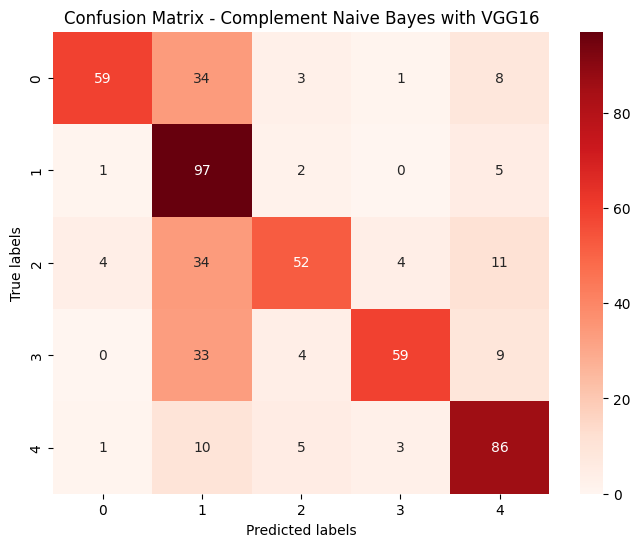

Training Gaussian Naive Bayes for VGG16...
Performance metrics for Gaussian Naive Bayes with VGG16:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.95      1.00      0.97       105
           2       0.98      0.97      0.98       105
           3       1.00      0.98      0.99       105
           4       1.00      1.00      1.00       105

    accuracy                           0.98       525
   macro avg       0.99      0.98      0.98       525
weighted avg       0.99      0.98      0.98       525

Accuracy: 0.9847619047619047
Sensitivity: 0.9847619047619048
Precision: 0.9853430353430355
F1 Score: 0.9848381278015147



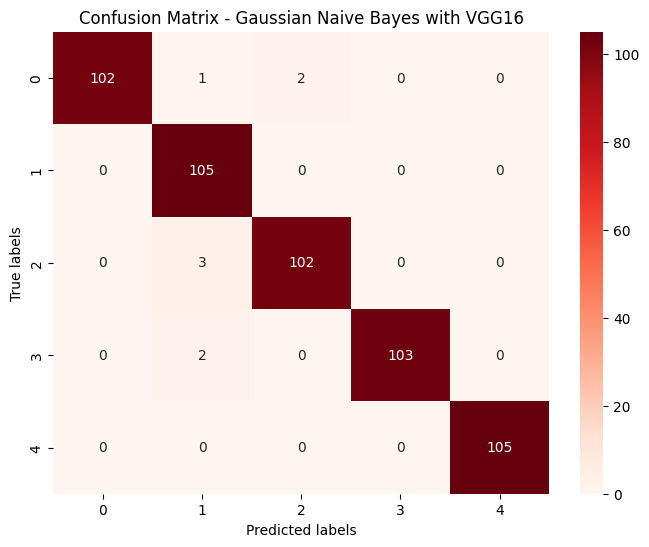

In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/A/DR_700/Train'
test_dir = '/content/drive/MyDrive/A/DR_700/Test'

# VGG16
model_vgg16 = VGG16(weights='imagenet', include_top=False)

# Function to extract features from an image using VGG16
def extract_features_vgg16(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Target size for VGG16
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model_vgg16.predict(img_data)
    return features

# Load images and extract features for VGG16
x_train_vgg16, y_train_vgg16 = [], []
x_test_vgg16, y_test_vgg16 = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_vgg16(os.path.join(class_dir, img_path))
        x_train_vgg16.append(features)
        y_train_vgg16.append(i)

# Load images and extract features for VGG16
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_vgg16(os.path.join(class_dir, img_path))
        x_test_vgg16.append(features)
        y_test_vgg16.append(i)

# Flatten the features for VGG16
x_train_flat_vgg16 = np.array([feature.flatten() for feature in x_train_vgg16])
x_test_flat_vgg16 = np.array([feature.flatten() for feature in x_test_vgg16])

# Scale the input features to the range [0, 1] for VGG16
scaler_vgg16 = MinMaxScaler()
x_train_scaled_vgg16 = scaler_vgg16.fit_transform(x_train_flat_vgg16)
x_test_scaled_vgg16 = scaler_vgg16.transform(x_test_flat_vgg16)

# Ensure non-negative values for VGG16
min_value_vgg16 = np.min(np.concatenate([x_train_scaled_vgg16, x_test_scaled_vgg16]))
x_train_scaled_non_negative_vgg16 = x_train_scaled_vgg16 - min_value_vgg16
x_test_scaled_non_negative_vgg16 = x_test_scaled_vgg16 - min_value_vgg16

# List of classifiers to try
classifiers = {
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

# Train classifiers for VGG16
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name} for VGG16...")
    # Train classifier
    clf.fit(x_train_scaled_non_negative_vgg16, y_train_vgg16)
    # Predict on test set
    y_pred_vgg16 = clf.predict(x_test_scaled_non_negative_vgg16)
    # Print performance metrics for VGG16
    print(f'Performance metrics for {clf_name} with VGG16:')
    print('Classification Report:')
    print(classification_report(y_test_vgg16, y_pred_vgg16))
    # Additional performance metrics
    accuracy_vgg16 = metrics.accuracy_score(y_test_vgg16, y_pred_vgg16)
    sensitivity_vgg16 = metrics.recall_score(y_test_vgg16, y_pred_vgg16, average='macro')
    precision_vgg16 = metrics.precision_score(y_test_vgg16, y_pred_vgg16, average='macro')
    f1_vgg16 = metrics.f1_score(y_test_vgg16, y_pred_vgg16, average='macro')
    print(f'Accuracy: {accuracy_vgg16}')
    print(f'Sensitivity: {sensitivity_vgg16}')
    print(f'Precision: {precision_vgg16}')
    print(f'F1 Score: {f1_vgg16}\n')
    # Plot confusion matrix
    cm_vgg16 = confusion_matrix(y_test_vgg16, y_pred_vgg16)
    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_vgg16, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name} with VGG16')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
